This notebook adds some time & seasonality features to the consumption data, to be used as covariates in the sequence models in notebooks 4.0 and 4.1.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data_dir = "C:/Users/Daniel/DeepLearningEnergyForecasting/data/analysis/processed/"

In [85]:
# Load full data, convert time to datetime
df = pd.read_csv(data_dir + "full_data.csv")
df_t = pd.read_csv(data_dir + "full_test_data.csv")

In [86]:
# 1. Lag 피처 생성 (예: 24시간 전의 전력소비량)
df['consumption_lag_24h'] = df['전력소비량(kWh)'].shift(24)

# 2. Trend 피처 생성
df['trend'] = np.arange(len(df))

# 3. 순환 피처(Cyclical Feature) 인코딩
# 시간
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df_t['hour_sin'] = np.sin(2 * np.pi * df_t['hour'] / 24)
df_t['hour_cos'] = np.cos(2 * np.pi * df_t['hour'] / 24)

# 요일
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df_t['day_of_week_sin'] = np.sin(2 * np.pi * df_t['day_of_week'] / 7)
df_t['day_of_week_cos'] = np.cos(2 * np.pi * df_t['day_of_week'] / 7)


# 최종 결과 확인
print(df.head())

   ESS저장용량(kWh)  PCS용량(kW)  day  day_of_week  hour  month  강수량(mm)  건물번호  \
0           0.0          0    1            5     0      6      0.0     1   
1           0.0          0    1            5     1      6      0.0     1   
2           0.0          0    1            5     2      6      0.0     1   
3           0.0          0    1            5     3      6      0.0     1   
4           0.0          0    1            5     4      6      0.0     1   

   건물유형_IDC(전화국)  건물유형_건물기타  ...  일조(hr)  전력소비량(kWh)  태양광용량(kW)  풍속(m/s)  \
0          False      False  ...     0.0     5794.80        0.0      2.6   
1          False      False  ...     0.0     5591.85        0.0      2.7   
2          False      False  ...     0.0     5338.17        0.0      2.6   
3          False      False  ...     0.0     4554.42        0.0      2.6   
4          False      False  ...     0.0     3602.25        0.0      1.3   

   consumption_lag_24h  trend  hour_sin  hour_cos  day_of_week_sin  \
0               

In [87]:
print(df_t.head())

   ESS저장용량(kWh)  PCS용량(kW)  day  day_of_week  hour  month  강수량(mm)  건물번호  \
0           0.0          0   25            6     0      8      0.0     1   
1           0.0          0   25            6     1      8      0.0     1   
2           0.0          0   25            6     2      8      0.0     1   
3           0.0          0   25            6     3      8      0.0     1   
4           0.0          0   25            6     4      8      0.0     1   

   건물유형_IDC(전화국)  건물유형_건물기타  ...  일사(MJ/m2)                   일시  일조(hr)  \
0          False      False  ...          0  2024-08-25 00:00:00       0   
1          False      False  ...          0  2024-08-25 01:00:00       0   
2          False      False  ...          0  2024-08-25 02:00:00       0   
3          False      False  ...          0  2024-08-25 03:00:00       0   
4          False      False  ...          0  2024-08-25 04:00:00       0   

   전력소비량(kWh)  태양광용량(kW)  풍속(m/s)  hour_sin  hour_cos  day_of_week_sin  \
0           

Text(0.5, 1.0, 'Hour (Cyclical)')

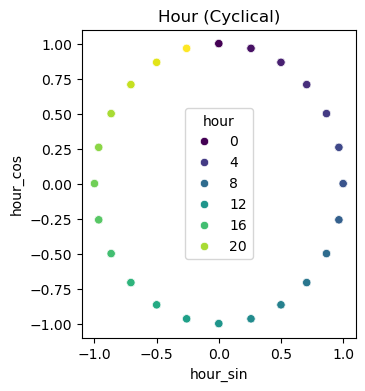

In [88]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
# hue 값으로 원본 'hour' 컬럼을 사용합니다.
sns.scatterplot(x=df['hour_sin'], y=df['hour_cos'], hue=df['hour'], palette='viridis')
plt.title("Hour (Cyclical)")

Text(0.5, 1.0, 'Hour for test (Cyclical)')

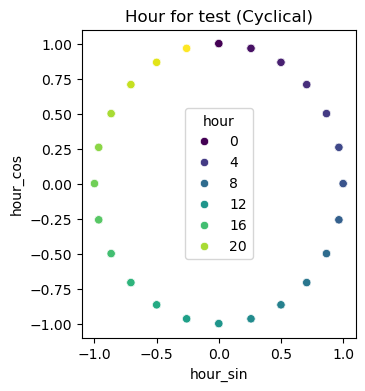

In [89]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
# hue 값으로 원본 'hour' 컬럼을 사용합니다.
sns.scatterplot(x=df_t['hour_sin'], y=df_t['hour_cos'], hue=df_t['hour'], palette='viridis')
plt.title("Hour for test (Cyclical)")

Text(0.5, 1.0, 'Day of Week (Cyclical)')

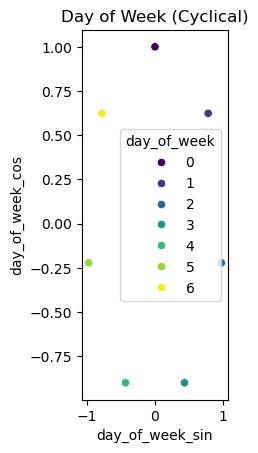

In [90]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['day_of_week_sin'], y=df['day_of_week_cos'], hue=df['day_of_week'], palette='viridis')
plt.title("Day of Week (Cyclical)")

Text(0.5, 1.0, 'Day of Week for test (Cyclical)')

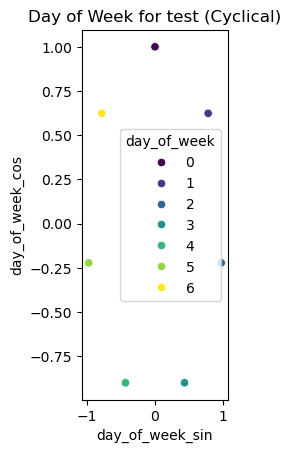

In [91]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_t['day_of_week_sin'], y=df_t['day_of_week_cos'], hue=df_t['day_of_week'], palette='viridis')
plt.title("Day of Week for test (Cyclical)")

In [92]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [93]:
# --- 3. 불필요한 컬럼 삭제 및 저장 ---
# 시각화가 끝났으므로 이제 원본 시간 컬럼을 삭제합니다.
df = df.drop(columns=['day', 'hour', 'day_of_week', '일조(hr)', '일사(MJ/m2)', '풍속(m/s)', '습도(%)', '강수량(mm)'])
df_t = df_t.drop(columns=['day', 'hour', 'day_of_week', '일조(hr)', '일사(MJ/m2)', '풍속(m/s)', '습도(%)', '강수량(mm)'])
# Lag 피처 생성 시 생긴 NaN 값을 포함한 행을 제거합니다.
df = df.dropna()
df_t = df_t.dropna()

In [94]:
df.to_csv(data_dir + "train_advanced_featured.csv", index=False)
df_t.to_csv(data_dir + "test_advanced_featured.csv", index=False)
print("Advanced feature engineering complete.")

Advanced feature engineering complete.
